# Vaccine Topic Notebook - Health Analytics Final Project

In [68]:
import pandas as pd
import numpy as np
import os

## Loading Tweets Data and EDA

In [2]:
df = pd.read_csv('C:\\Users\\fmfor\\Downloads\\COVID19Tweets_HA_final_v2.csv')

In [3]:
df.head()

,Unnamed: 0,index,Tweet Id,text,Tweet Datetime,Source,tags,Retweets,Favorites,Twitter @ Name,user loc,verified,followers,tweets
0,0,0,1369043001851469825,This is an excellent resource for health prof...,2021-03-08 21:51:01,Twitter Web App,NaN,9,0,JHUrbanHealth,"Baltimore, MD",False,1816,3243
1,1,1,1369043000307879939,Obese COVID19 patients are more likely to expe...,2021-03-08 21:51:01,Twitter Web App,"Obese,COVID19",0,0,SVestiga,"Leesburg, Virginia",False,73,268
2,2,2,1369042999745912840,Member Snapshot Every day InterAction Member...,2021-03-08 21:51:01,Sprout Social,NaN,0,0,InterActionOrg,"Washington, DC",True,34442,23318
3,3,3,1369042999699791880,We have released a new COVID19 guidance do...,2021-03-08 21:51:01,Twitter for iPhone,COVID19,8,0,mrsgossett10,Louisville Male High School,False,184,3646
4,4,4,1369042999385059330,Inclusion in s list of women sharing lessons...,2021-03-08 21:51:01,Twitter Web App,Taiwan,105,0,tanenori,埼玉県川口市,False,1493,337086


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34081 entries, 0 to 34080
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      34081 non-null  int64 
 1   index           34081 non-null  int64 
 2   Tweet Id        34081 non-null  int64 
 3   text            34081 non-null  object
 4   Tweet Datetime  34081 non-null  object
 5   Source          33852 non-null  object
 6   tags            25238 non-null  object
 7   Retweets        34081 non-null  int64 
 8   Favorites       34081 non-null  int64 
 9   Twitter @ Name  34081 non-null  object
 10  user loc        26861 non-null  object
 11  verified        34081 non-null  bool  
 12  followers       34081 non-null  int64 
 13  tweets          34081 non-null  int64 
dtypes: bool(1), int64(7), object(6)
memory usage: 3.4+ MB


In [5]:
#Fill missing tags, source and user location with value of 'Not available'
df['tags'].fillna(value = 'Not available', inplace = True)
df['Source'].fillna(value = 'Not available', inplace = True)
df['user loc'].fillna(value = 'Not available', inplace = True)

In [6]:
#Transform object to datatime object for 'Tweet Datetime' column
df['Tweet Datetime'] = pd.to_datetime(df['Tweet Datetime'], format = '%Y-%m-%dT%H:%M:%S')

## NLP Analysis

In [7]:
# Installing and creating a WC function for visualizations
! pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [69]:
! pip install stop-words
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmfor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fmfor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

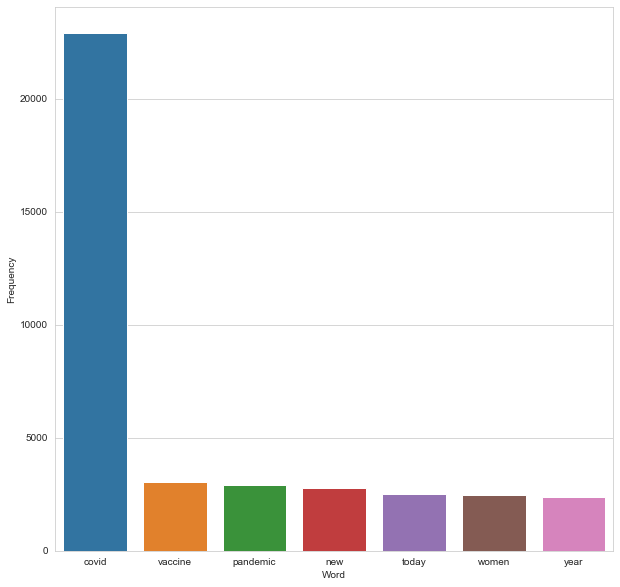

In [9]:
#Frequency of words in Tweets
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

top_N = 100

a = df['text'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_tweet = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate distribution
word_dist = nltk.FreqDist(cleaned_tweet)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [10]:
rslt.head()

,Word,Frequency
0,covid,22897
1,vaccine,3048
2,pandemic,2922
3,new,2798
4,today,2519


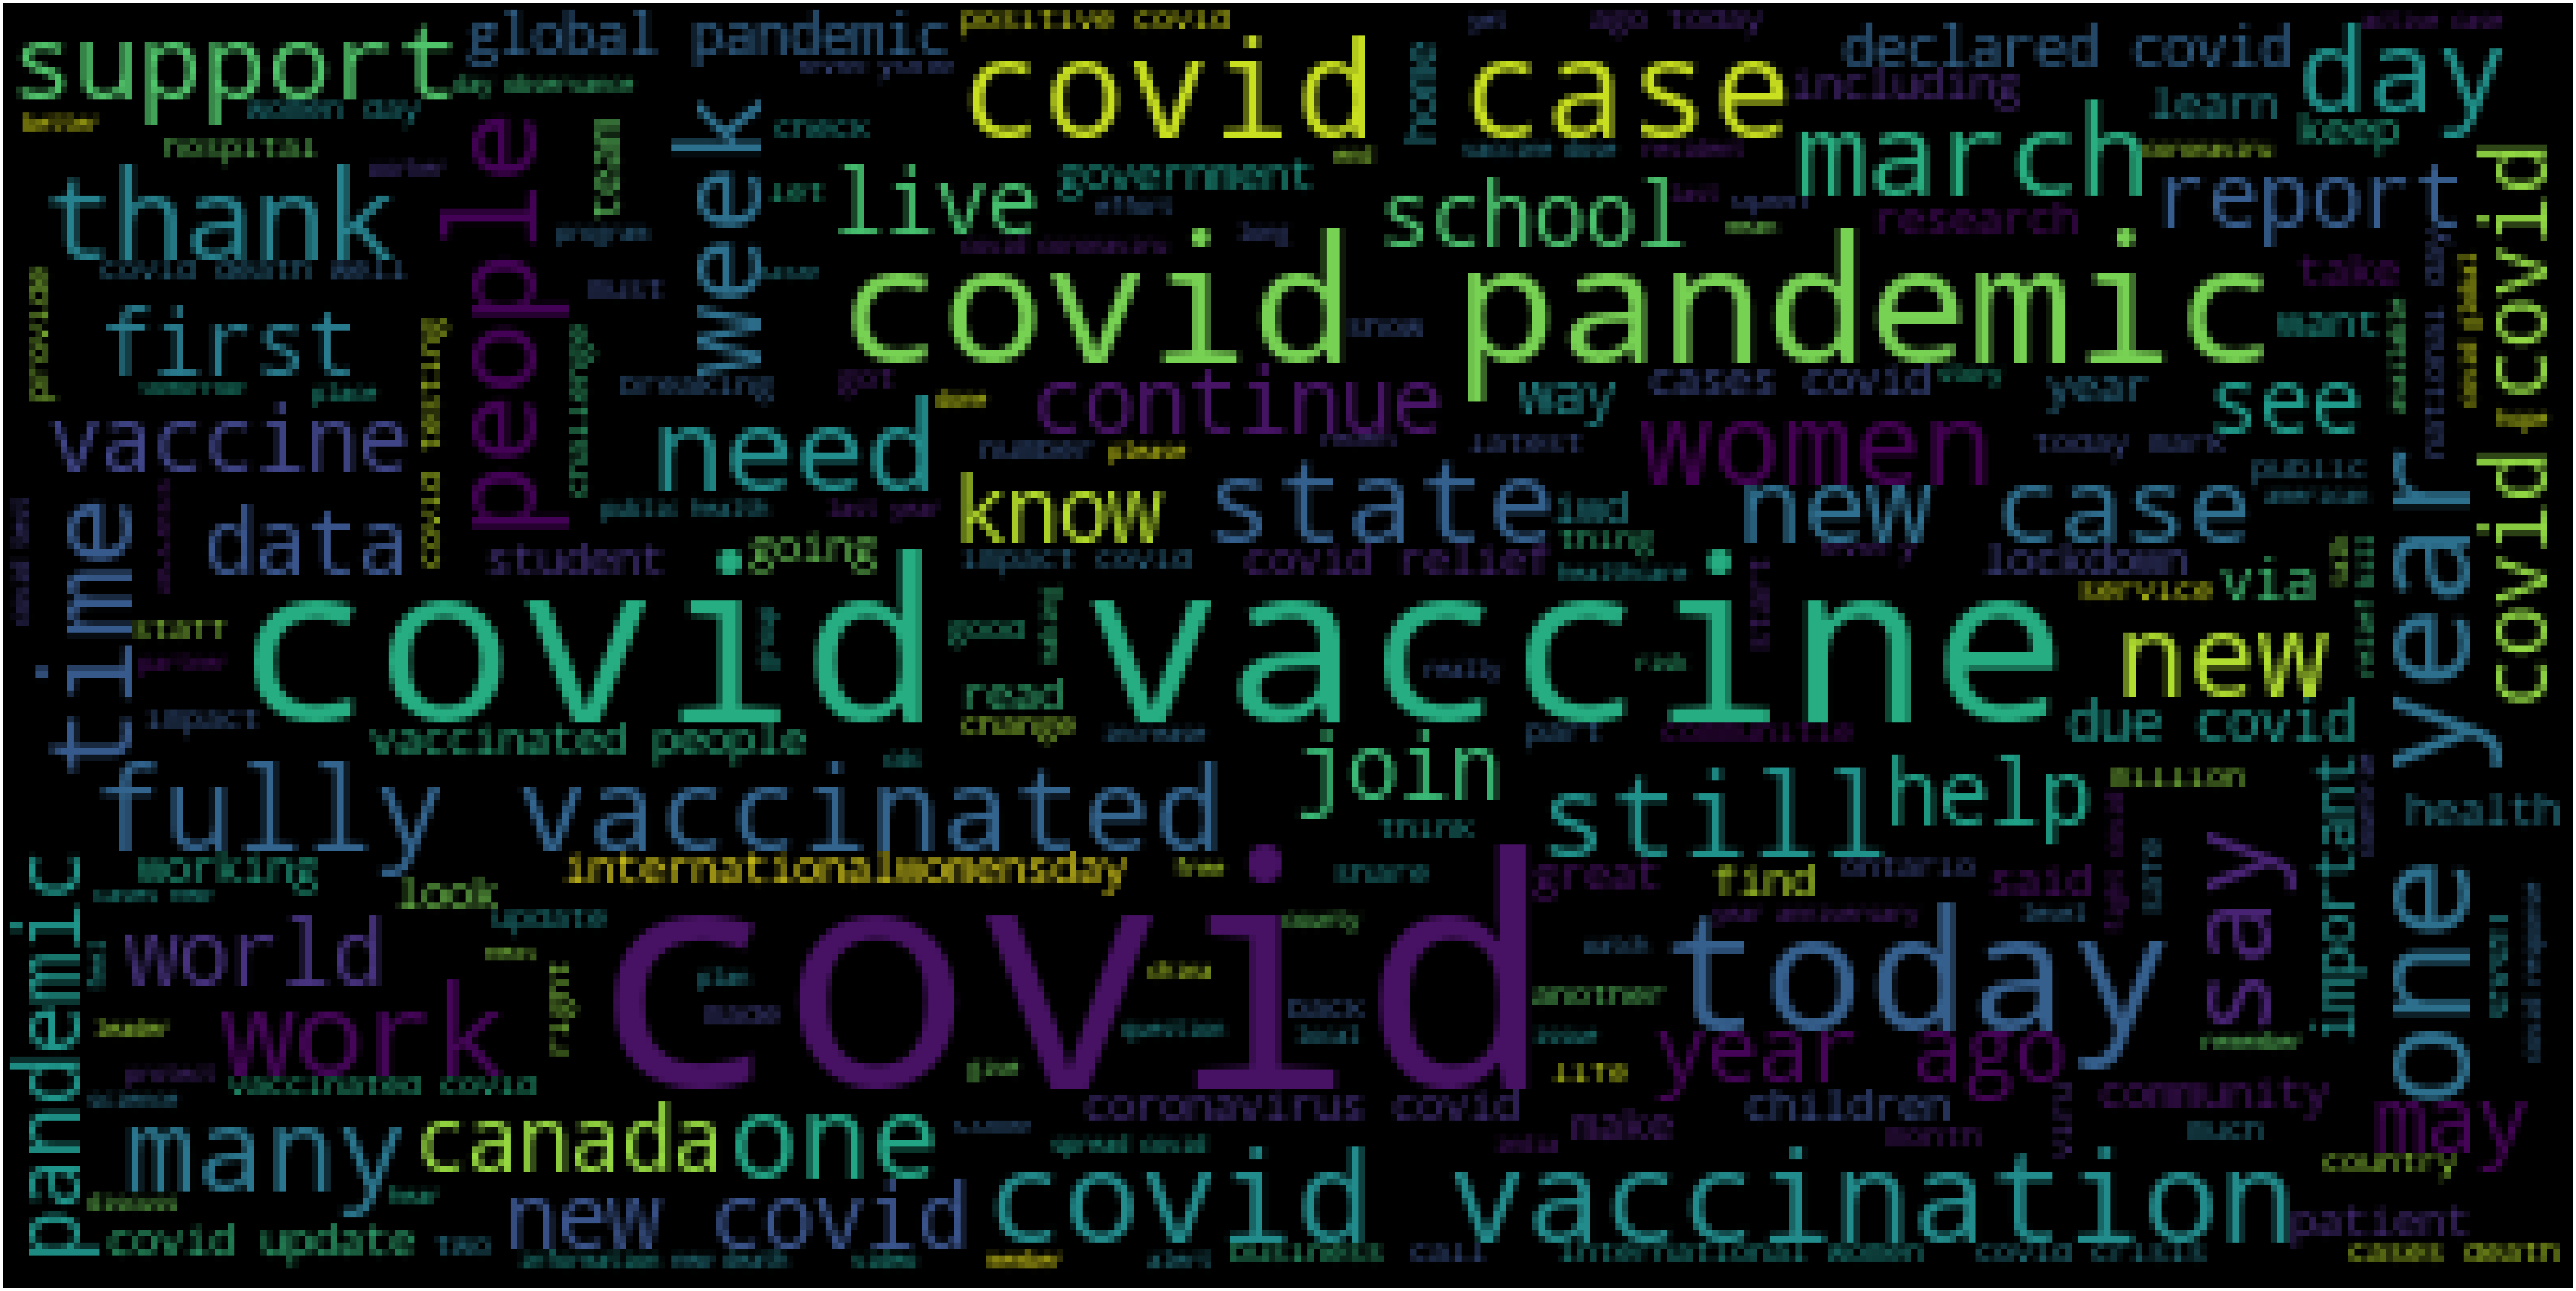

In [11]:
# Top words on tweets
wc(cleaned_tweet,'black','Common Words' )

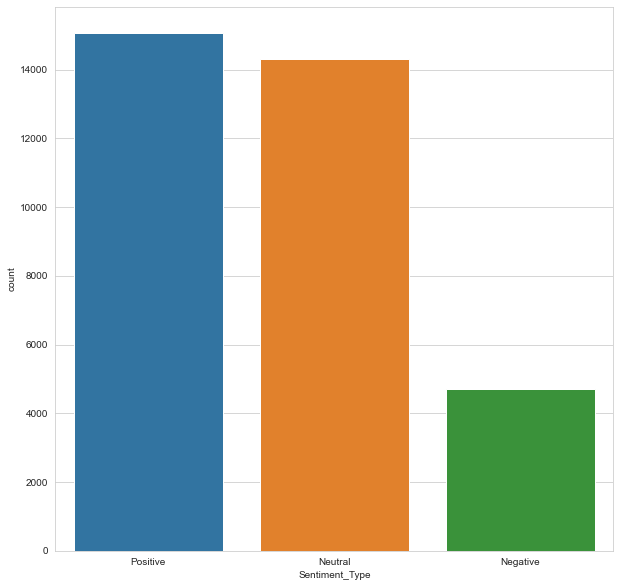

In [12]:
#Sentiments Analysis on tweets
! pip install textblob
from textblob import TextBlob

bloblist_desc = list()

df_tweet_descr_str=df['text'].astype(str)
for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_polarity_desc['Sentiment_Type'] = df_tweet_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_tweet_polarity_desc)

In [13]:
df_tweet_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,This is an excellent resource for health prof...,0.600000,0.550000,Positive
1,Obese COVID19 patients are more likely to expe...,0.033333,0.700000,Positive
2,Member Snapshot Every day InterAction Member...,0.000000,0.000000,Neutral
3,We have released a new COVID19 guidance do...,0.068182,0.602273,Positive
4,Inclusion in s list of women sharing lessons...,0.000000,0.100000,Neutral
...,...,...,...,...
34076,COVID19 A year after today co GMi9gz5wWa,0.000000,0.000000,Neutral
34077,COVIDVaccines will help prepare your body to ...,0.000000,0.000000,Neutral
34078,Approaching a year of when I began tracking th...,0.000000,0.000000,Neutral
34079,We applaud the relief for thousands of Venezue...,0.000000,0.000000,Neutral


In [14]:
df_tweet_polarity_desc.to_csv(r'C:\\Users\\fmfor\\Documents\\NLTK Sentiment Analysis Results.csv', index = False)

In [15]:
# # Text (tweet) Analysis

def wcloud(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 10,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

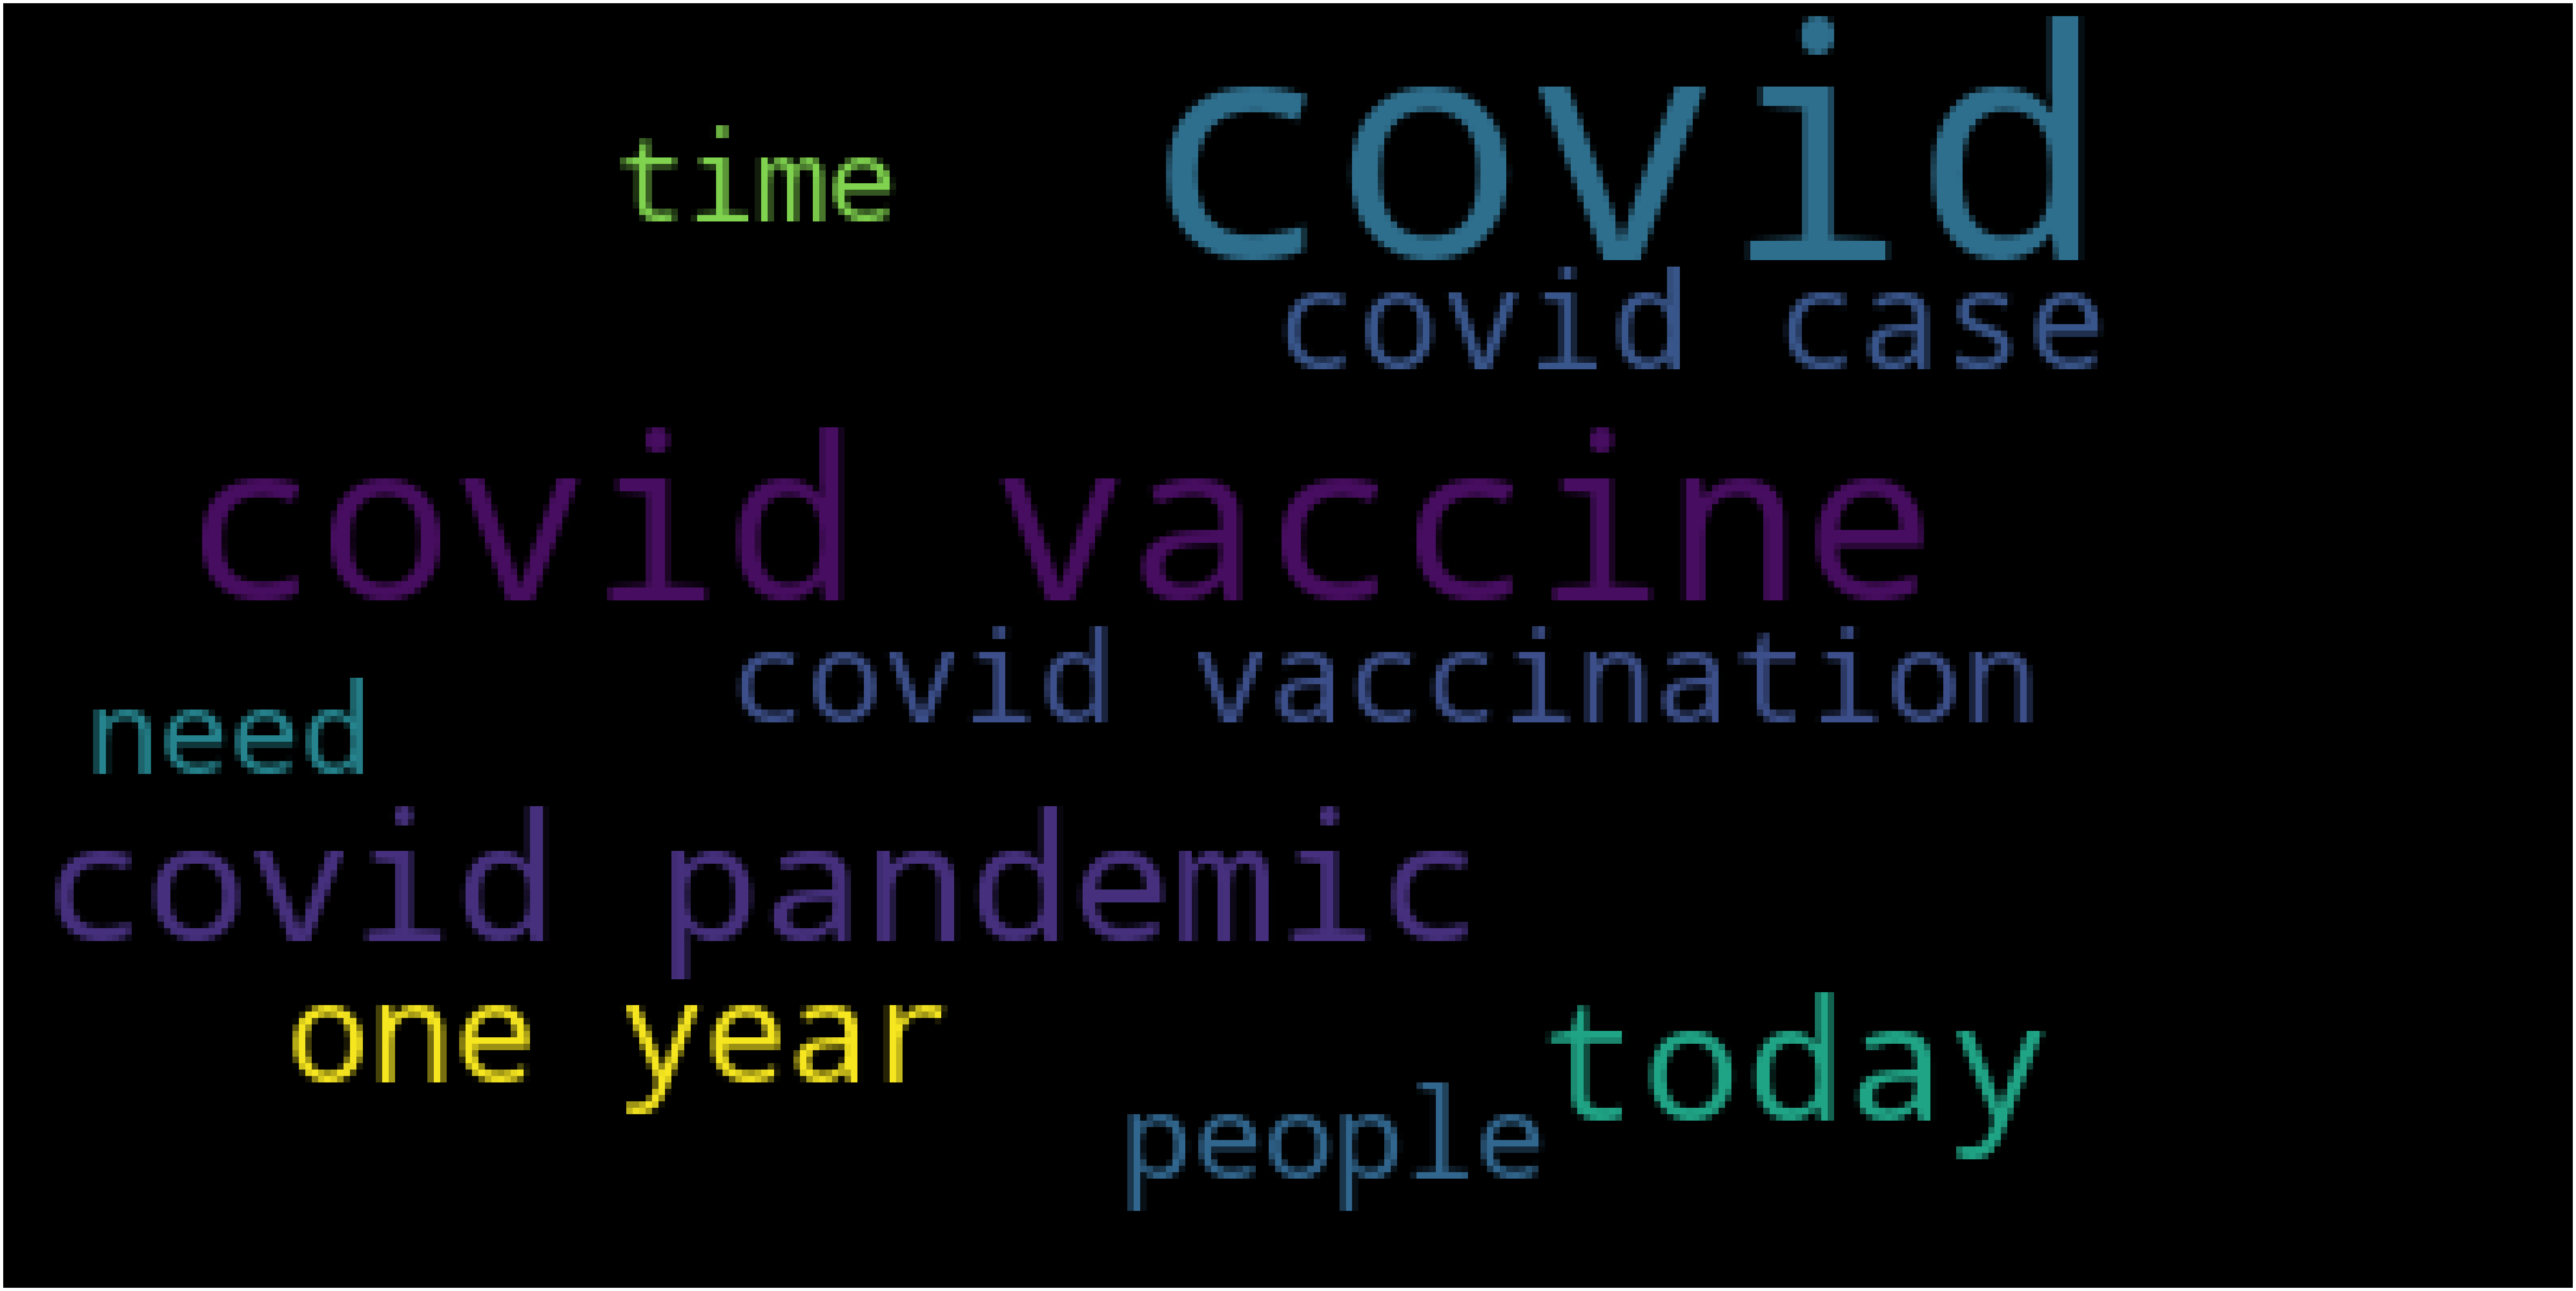

In [16]:
# Top words on tweets
wcloud(cleaned_tweet,'black','Common Words' )

In [17]:
List_tweet = ' '.join([str(elem) for elem in cleaned_tweet]) 

In [18]:
tweet_topic_count = WordCloud().process_text(List_tweet)

In [19]:
tweet_dataframe = pd.DataFrame.from_dict(tweet_topic_count, orient='index', dtype=None, columns=None)
tweet_dataframe = tweet_dataframe.sort_values(by= 0, ascending=False)
tweet_dataframe.reset_index(inplace=True)
tweet_dataframe = tweet_dataframe.rename(columns = {'index':'Tweet'})
tweet_dataframe.columns=['Tweet', 'Count']

In [20]:
tweet_dataframe.head(10)

,Tweet,Count
0,covid,5693
1,covid vaccine,2561
2,covid pandemic,1333
3,today,1270
4,one year,849
5,covid case,785
6,covid vaccination,691
7,need,633
8,people,613
9,time,612


In [21]:
# Tags Analysis

a = df['tags'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_tags = [word for word in without_single_chr if not word.isnumeric()]  

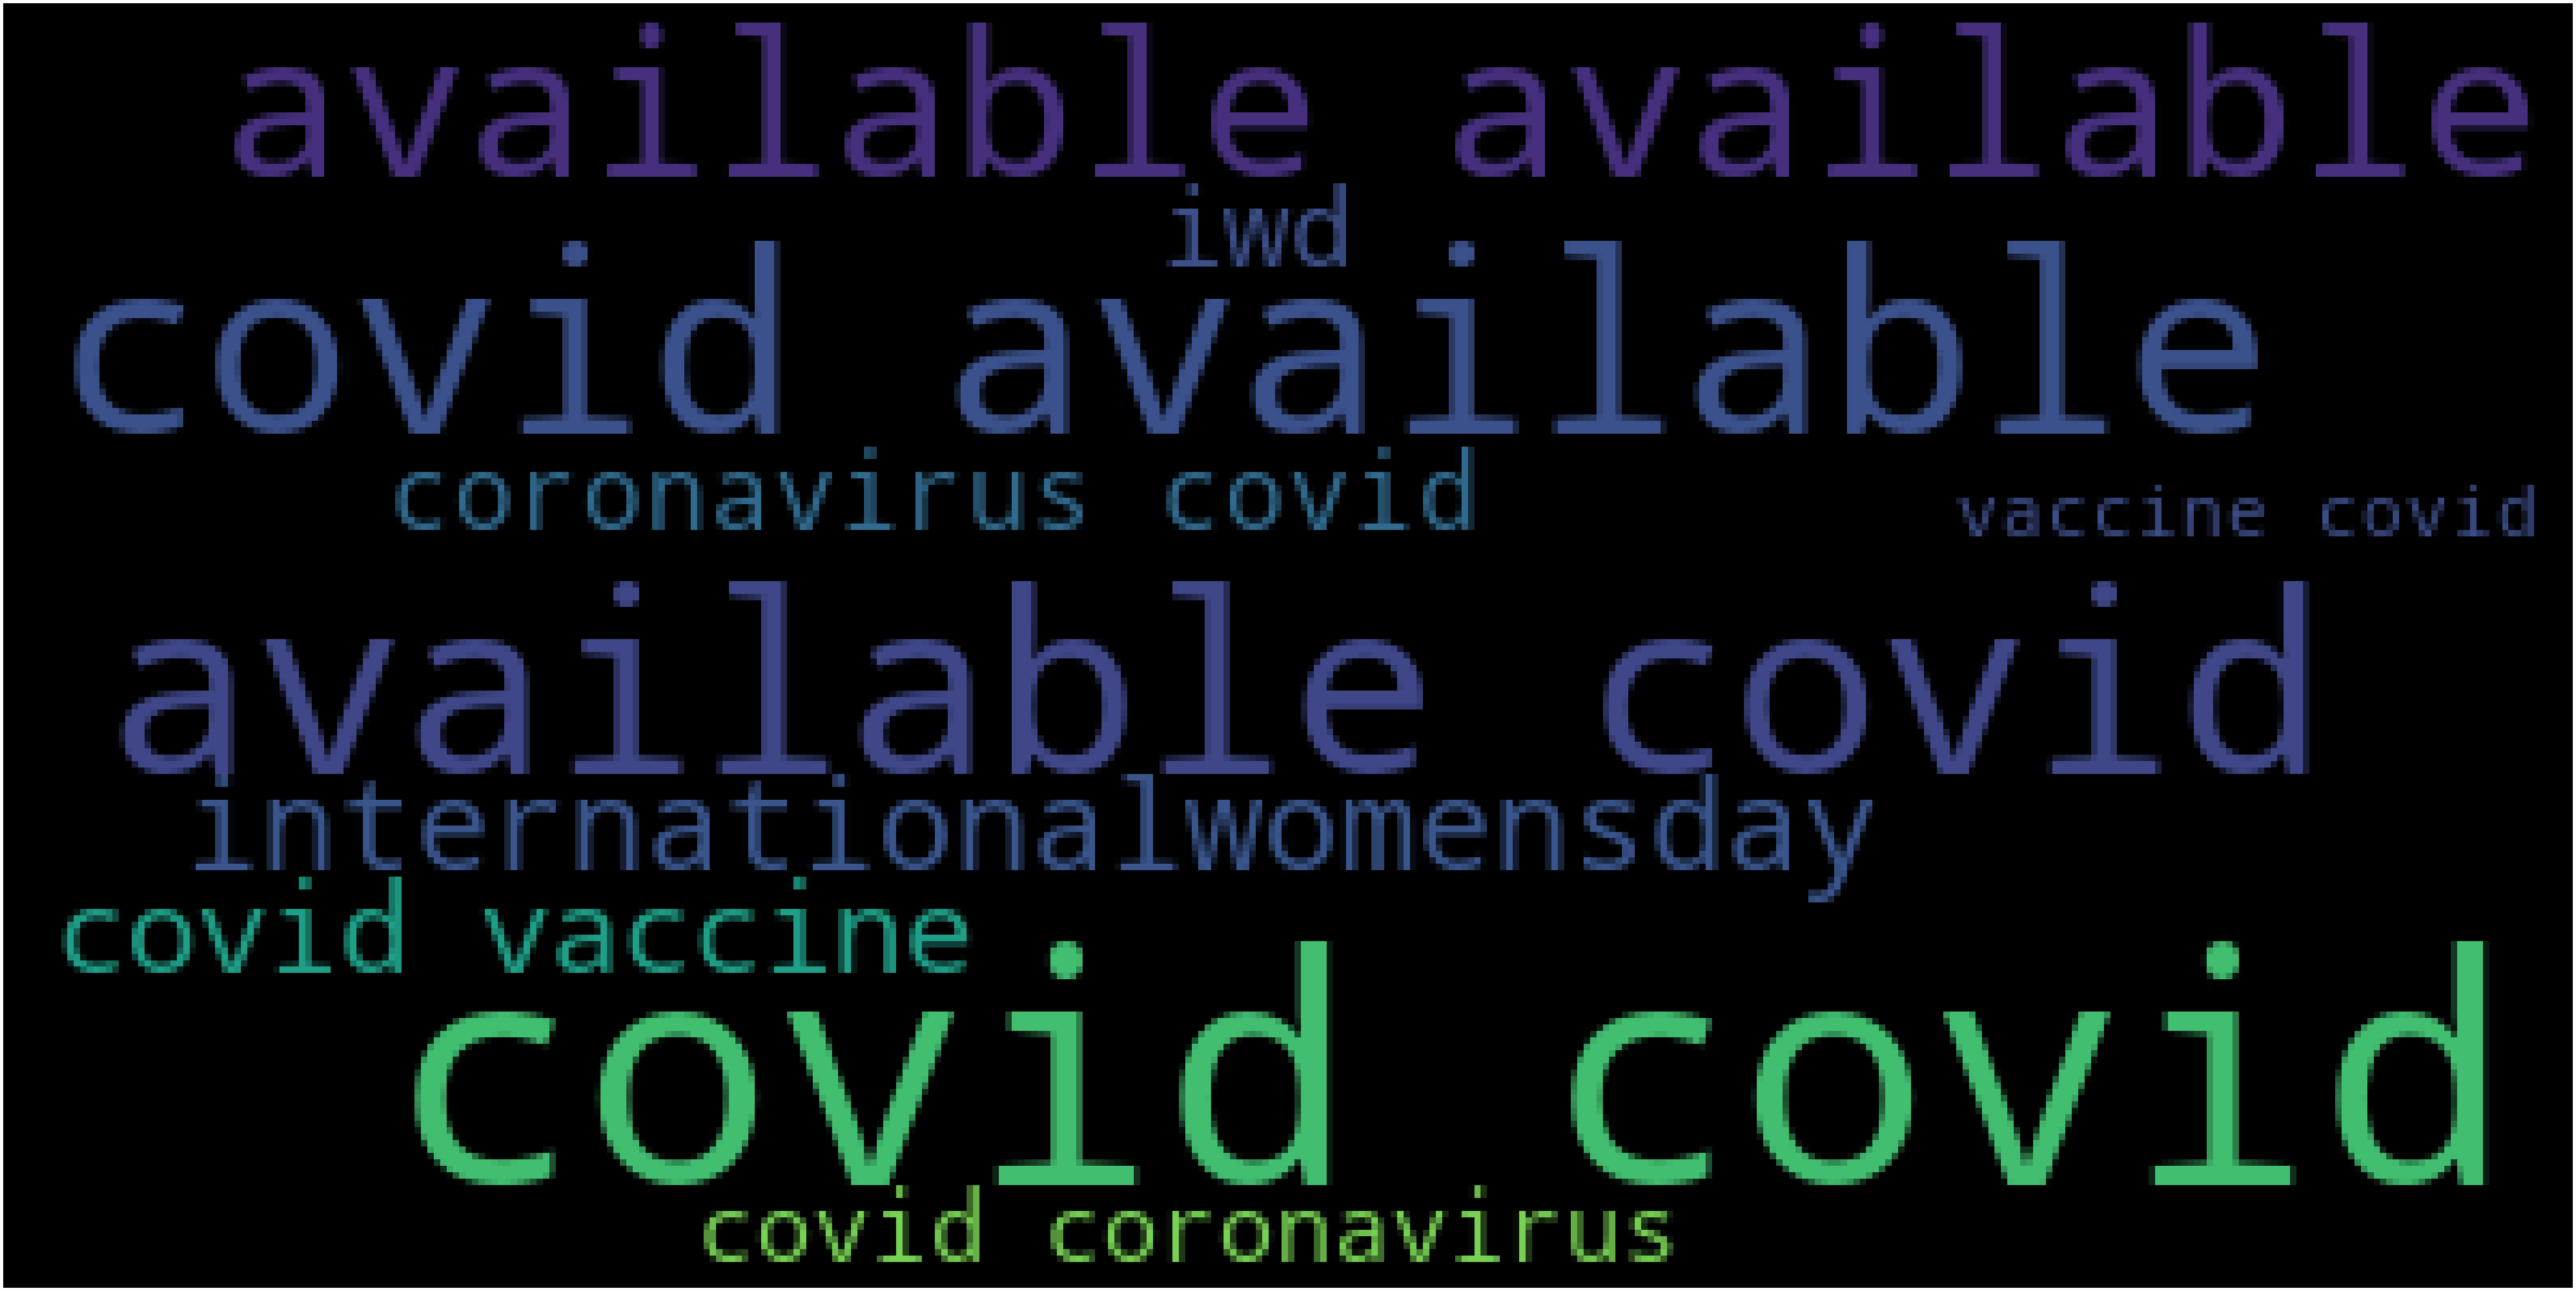

In [22]:
# Top words on tweets
wcloud(cleaned_tags,'black','Common Words' )

In [23]:
List_tags = ' '.join([str(elem) for elem in cleaned_tags]) 

In [24]:
Tag_topic_count = WordCloud().process_text(List_tags)

In [25]:
tags_dataframe = pd.DataFrame.from_dict(Tag_topic_count, orient='index', dtype=None, columns=None)
tags_dataframe = tags_dataframe.sort_values(by= 0, ascending=False)
tags_dataframe.reset_index(inplace=True)
tags_dataframe = tags_dataframe.rename(columns = {'index':'Tags'})
tags_dataframe.columns=['Tags', 'Count']

In [42]:
tags_dataframe.head(40)

,Tags,Count
0,covid covid,6418
1,available covid,3612
2,covid available,3610
3,available available,2356
4,internationalwomensday,753
5,covid vaccine,662
6,iwd,538
7,coronavirus covid,463
8,covid coronavirus,449
9,vaccine covid,229


In [27]:
# Overall analysis (append of tags and tweets)

text = df["text"]
tags = df["tags"]

append = pd.DataFrame(text.append(tags))
append.columns=['Tags/Text']

In [28]:
append.head()

,Tags/Text
0,This is an excellent resource for health prof...
1,Obese COVID19 patients are more likely to expe...
2,Member Snapshot Every day InterAction Member...
3,We have released a new COVID19 guidance do...
4,Inclusion in s list of women sharing lessons...


In [29]:
# Append Analysis

a = append['Tags/Text'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_total = [word for word in without_single_chr if not word.isnumeric()]  

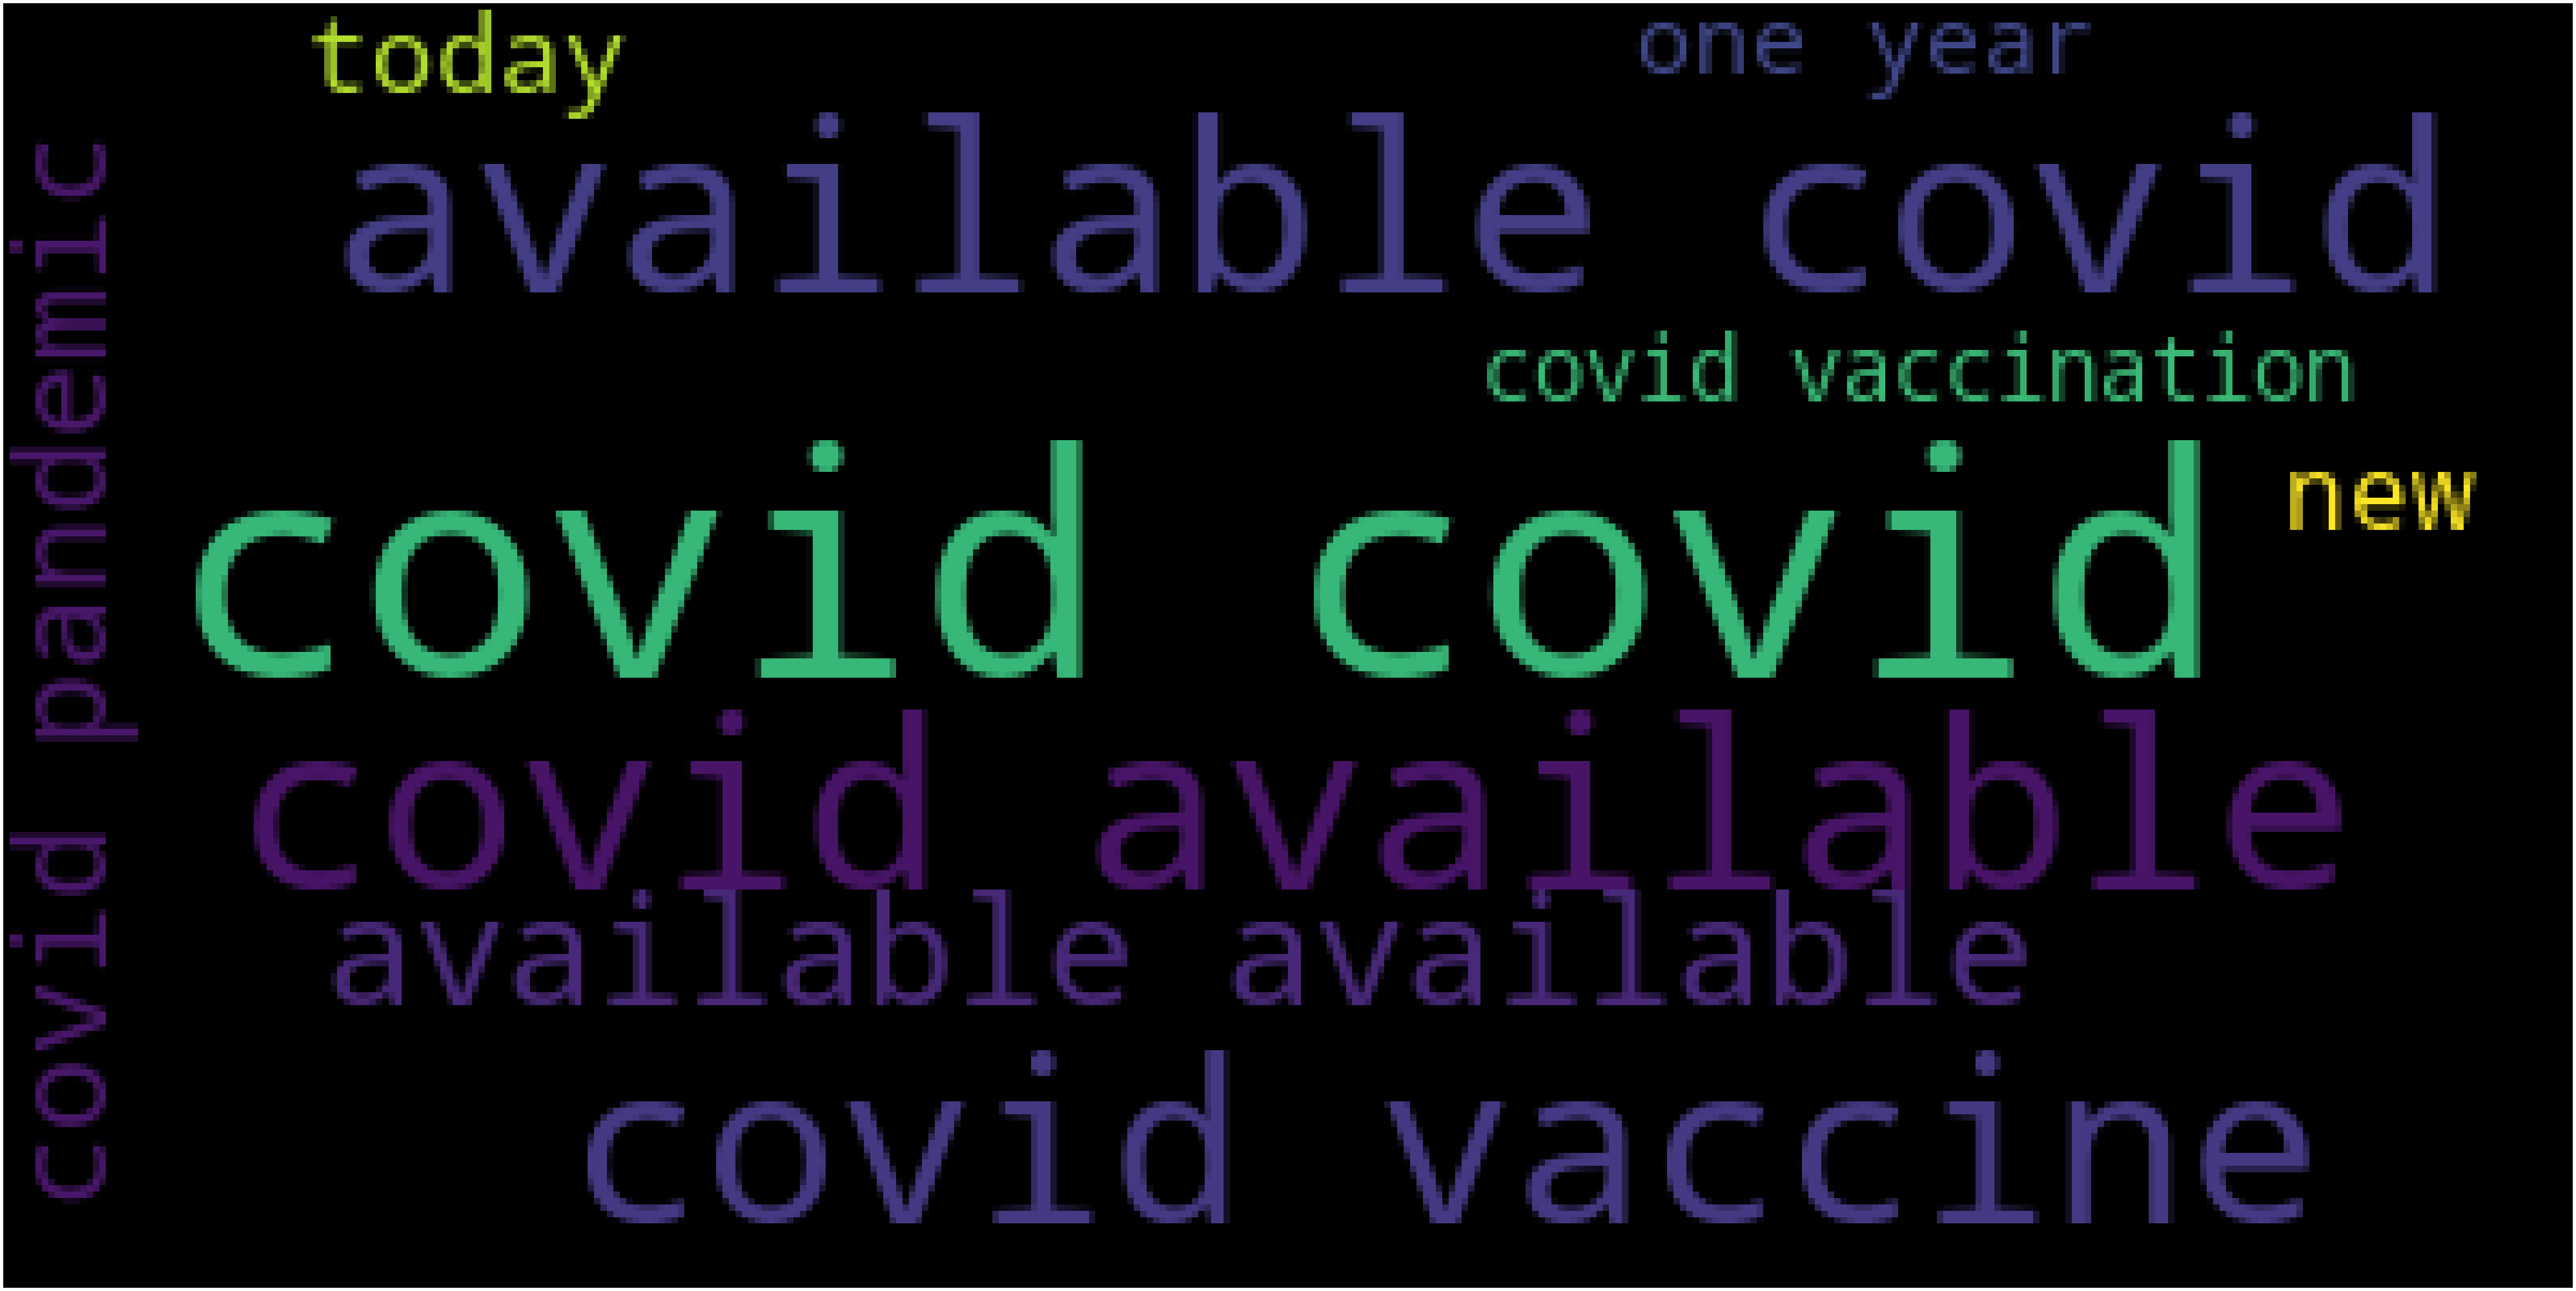

In [30]:
# Top words on tweets
wcloud(cleaned_total,'black','Common Words' )

In [31]:
List_tags = ' '.join([str(elem) for elem in cleaned_total]) 

In [32]:
total_topic_count = WordCloud().process_text(List_tags)

In [33]:
total_dataframe = pd.DataFrame.from_dict(total_topic_count, orient='index', dtype=None, columns=None)
total_dataframe = total_dataframe.sort_values(by= 0, ascending=False)
total_dataframe.reset_index(inplace=True)
total_dataframe = total_dataframe.rename(columns = {'index':'Total'})
total_dataframe.columns=['Total', 'Count']

In [45]:
total_dataframe.head(40)

,Total,Count
0,covid covid,6842
1,available covid,3627
2,covid available,3613
3,covid vaccine,3223
4,available available,2357
5,covid pandemic,1529
6,today,1033
7,new,921
8,one year,849
9,covid vaccination,842


In [37]:
df.head()

,Unnamed: 0,index,Tweet Id,text,Tweet Datetime,Source,tags,Retweets,Favorites,Twitter @ Name,user loc,verified,followers,tweets
0,0,0,1369043001851469825,This is an excellent resource for health prof...,2021-03-08 21:51:01,Twitter Web App,Not available,9,0,JHUrbanHealth,"Baltimore, MD",False,1816,3243
1,1,1,1369043000307879939,Obese COVID19 patients are more likely to expe...,2021-03-08 21:51:01,Twitter Web App,"Obese,COVID19",0,0,SVestiga,"Leesburg, Virginia",False,73,268
2,2,2,1369042999745912840,Member Snapshot Every day InterAction Member...,2021-03-08 21:51:01,Sprout Social,Not available,0,0,InterActionOrg,"Washington, DC",True,34442,23318
3,3,3,1369042999699791880,We have released a new COVID19 guidance do...,2021-03-08 21:51:01,Twitter for iPhone,COVID19,8,0,mrsgossett10,Louisville Male High School,False,184,3646
4,4,4,1369042999385059330,Inclusion in s list of women sharing lessons...,2021-03-08 21:51:01,Twitter Web App,Taiwan,105,0,tanenori,埼玉県川口市,False,1493,337086


## Exporting Vaccine DataFrame

In [43]:
df1 = df[df['text'].str.contains("vaccine") | df['tags'].str.contains('vaccine') | df['text'].str.contains('vaccinated') | df['text'].str.contains('vaccination') | df['tags'].str.contains('astrazeneca')] 
len(df1)

5154

In [44]:
df1.to_csv(r'C:\\Users\\fmfor\\Documents\\Vaccine DataFrame.csv', index = False)

In [49]:
df_flag = pd.read_csv('C:\\Users\\fmfor\\Documents\\Vaccine_DataFrame.csv')

In [50]:
df_flag.head()

,Tweet ID,text,Number of Characters,Results,Negative Score,Positive Score,Tweet Datetime,Source,tags,Retweets,...,user loc,verified,followers,tweets,Brand 1 (pfizer),Brand 2 (johnson & johnson),Brand 3 (Moderna),Brand 4 (AstraZeneca),Several Brands,Brand Flag
0,1.369040e+18,I m watching one of my facebook followers in B...,101,negative,1.0,8.230000e-18,3/8/21 9:51 PM,Twitter Web App,COVID19,0,...,0,False,603,43997,1,1,1,1,4,NaN
1,1.369040e+18,A domestic digital vaccine permit could easil...,116,negative,1.0,0.000000e+00,3/8/21 9:50 PM,Twitter Web App,0,177,...,0,False,171,1815,1,1,1,1,4,NaN
2,1.369040e+18,No libertarian would ever dream of giving the...,120,negative,1.0,1.330000e-30,3/8/21 9:50 PM,Twitter for Android,0,323,...,"Liverpool, England",False,399,10945,1,1,1,1,4,NaN
3,1.369040e+18,Rep and I agree with less than 6 of COVID...,90,negative,1.0,5.270000e-37,3/8/21 9:50 PM,Twitter for Android,COVID19,13,...,NW Florida,False,246,15228,1,1,1,1,4,NaN
4,1.369040e+18,The US CDC guidance suggests how people can i...,121,negative,1.0,2.160000e-38,3/8/21 9:50 PM,Twitter for Android,COVID19,39,...,Canada & USA,False,534,3228,1,1,1,1,4,NaN


In [78]:
df_pos = df_flag[df_flag.Results.eq("positive")]

In [79]:
# Positive word cloud

a = df_pos['text'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_total_pos = [word for word in without_single_chr if not word.isnumeric()]  

In [80]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [81]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50,color_func=grey_color_func)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

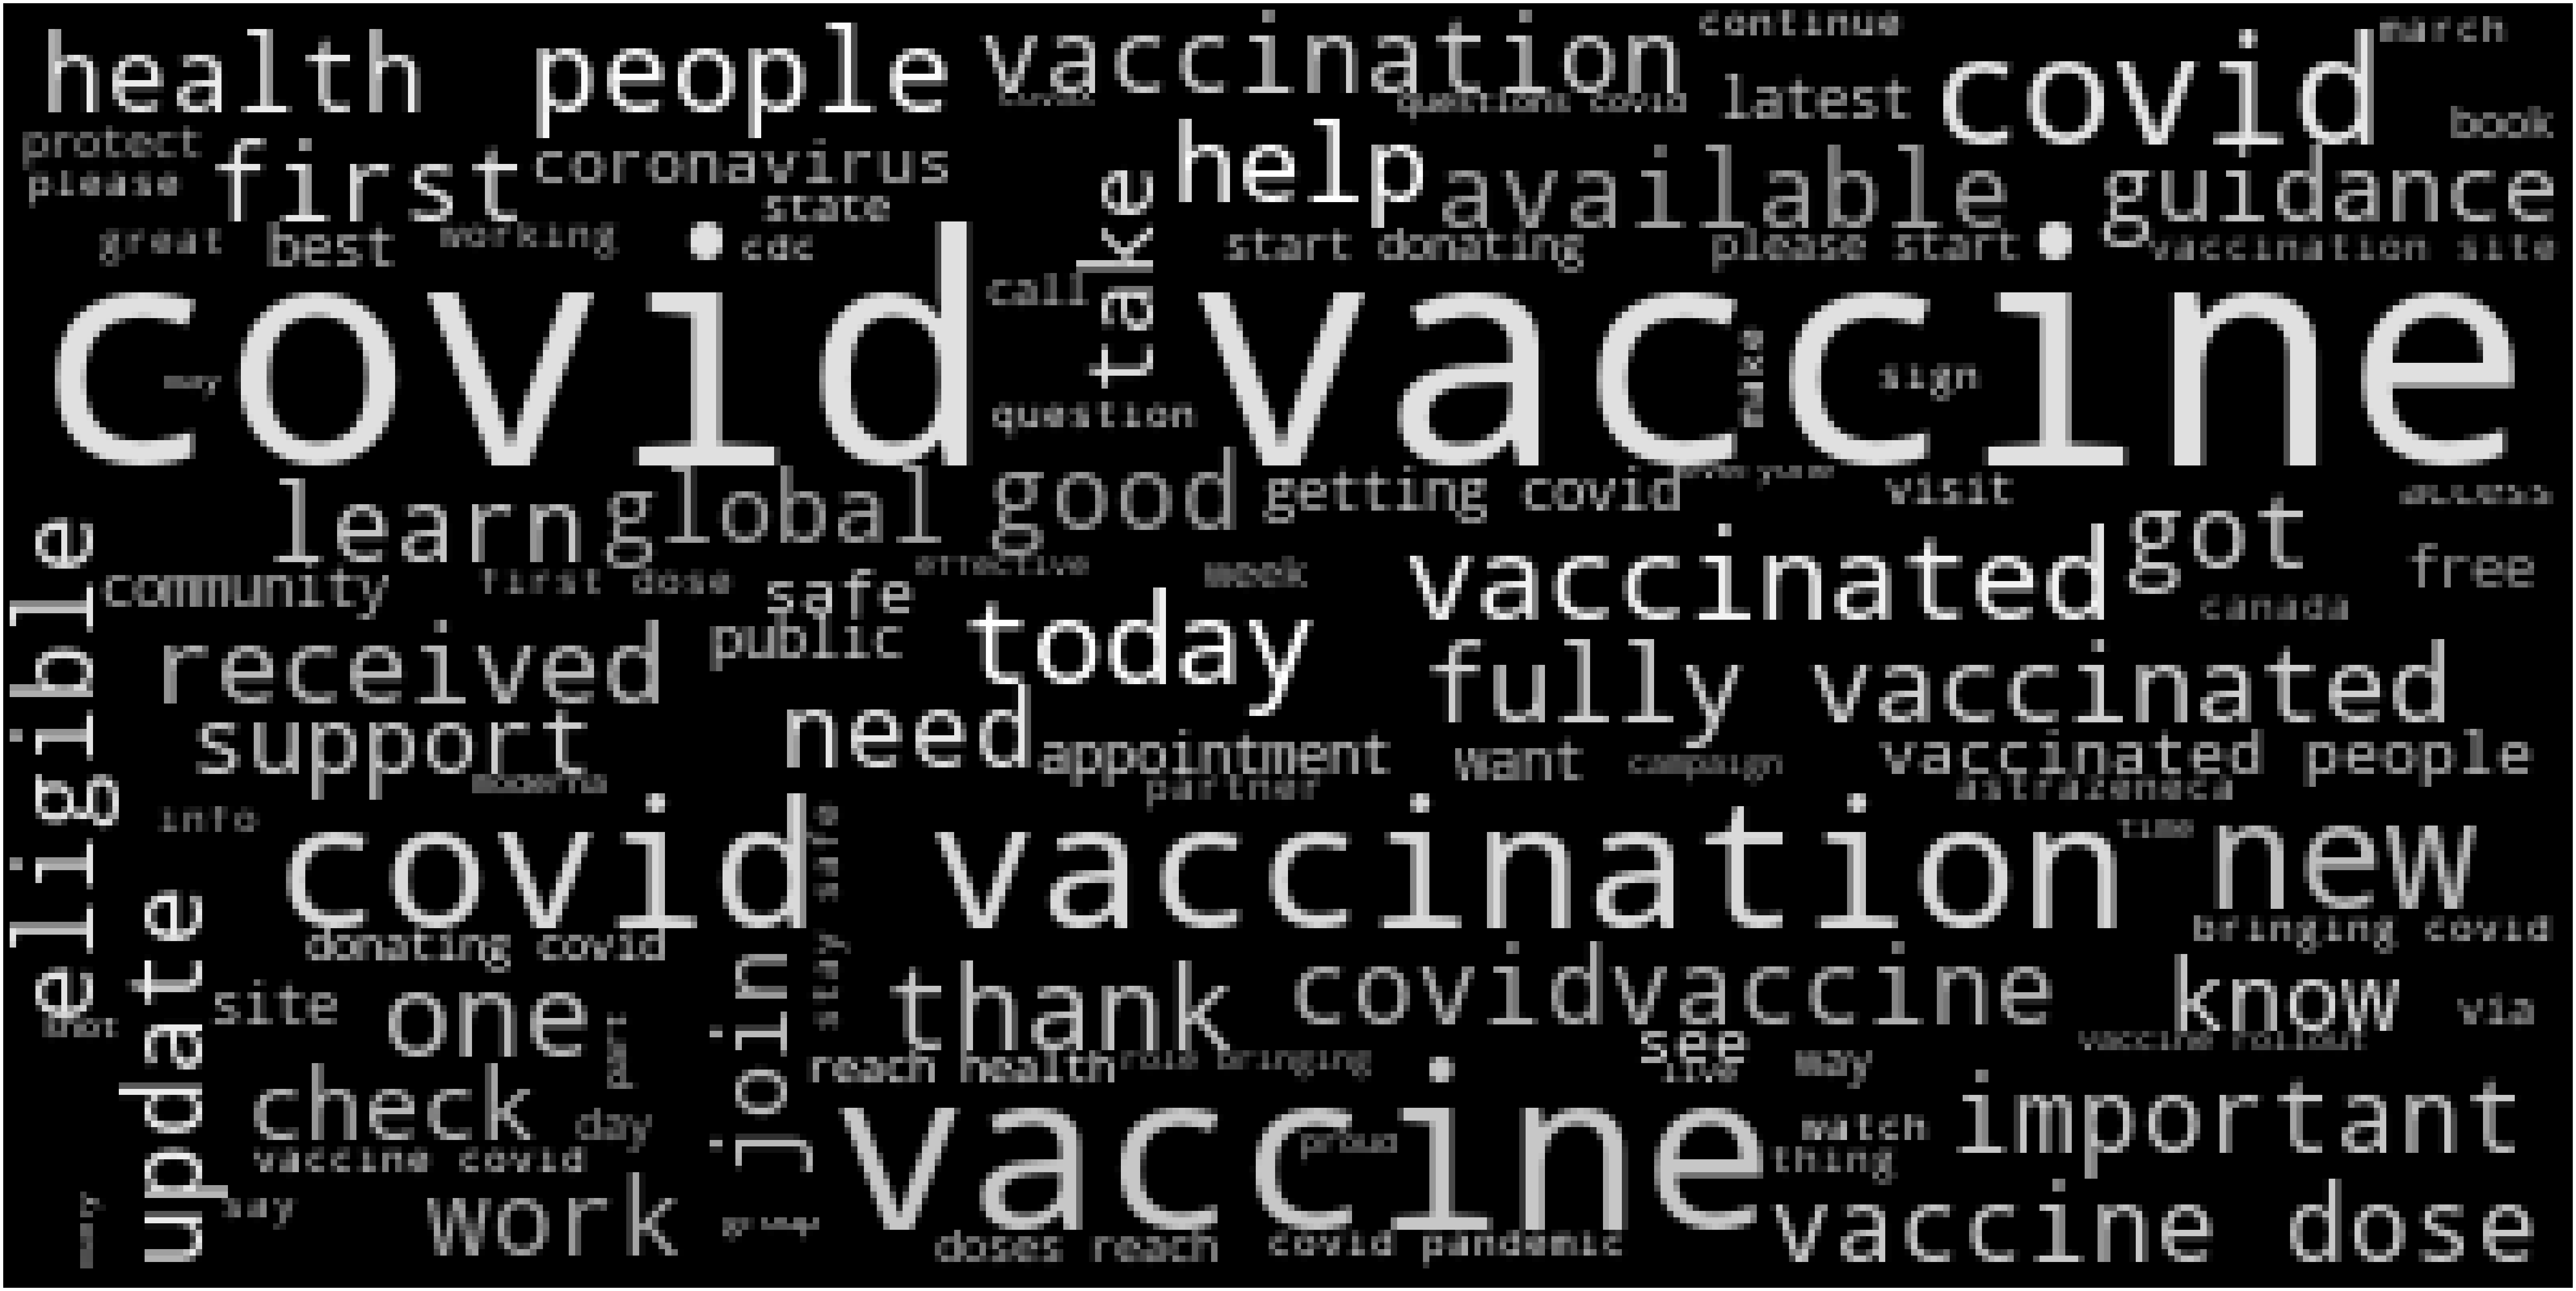

In [82]:
# Top words on tweets
wc(cleaned_total_pos,'black','Common Words' )

In [83]:
df_neg = df_flag[df_flag.Results.eq("negative")]

In [84]:
# Positive word cloud

a = df_neg['text'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

#remove the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_total_neg = [word for word in without_single_chr if not word.isnumeric()]  

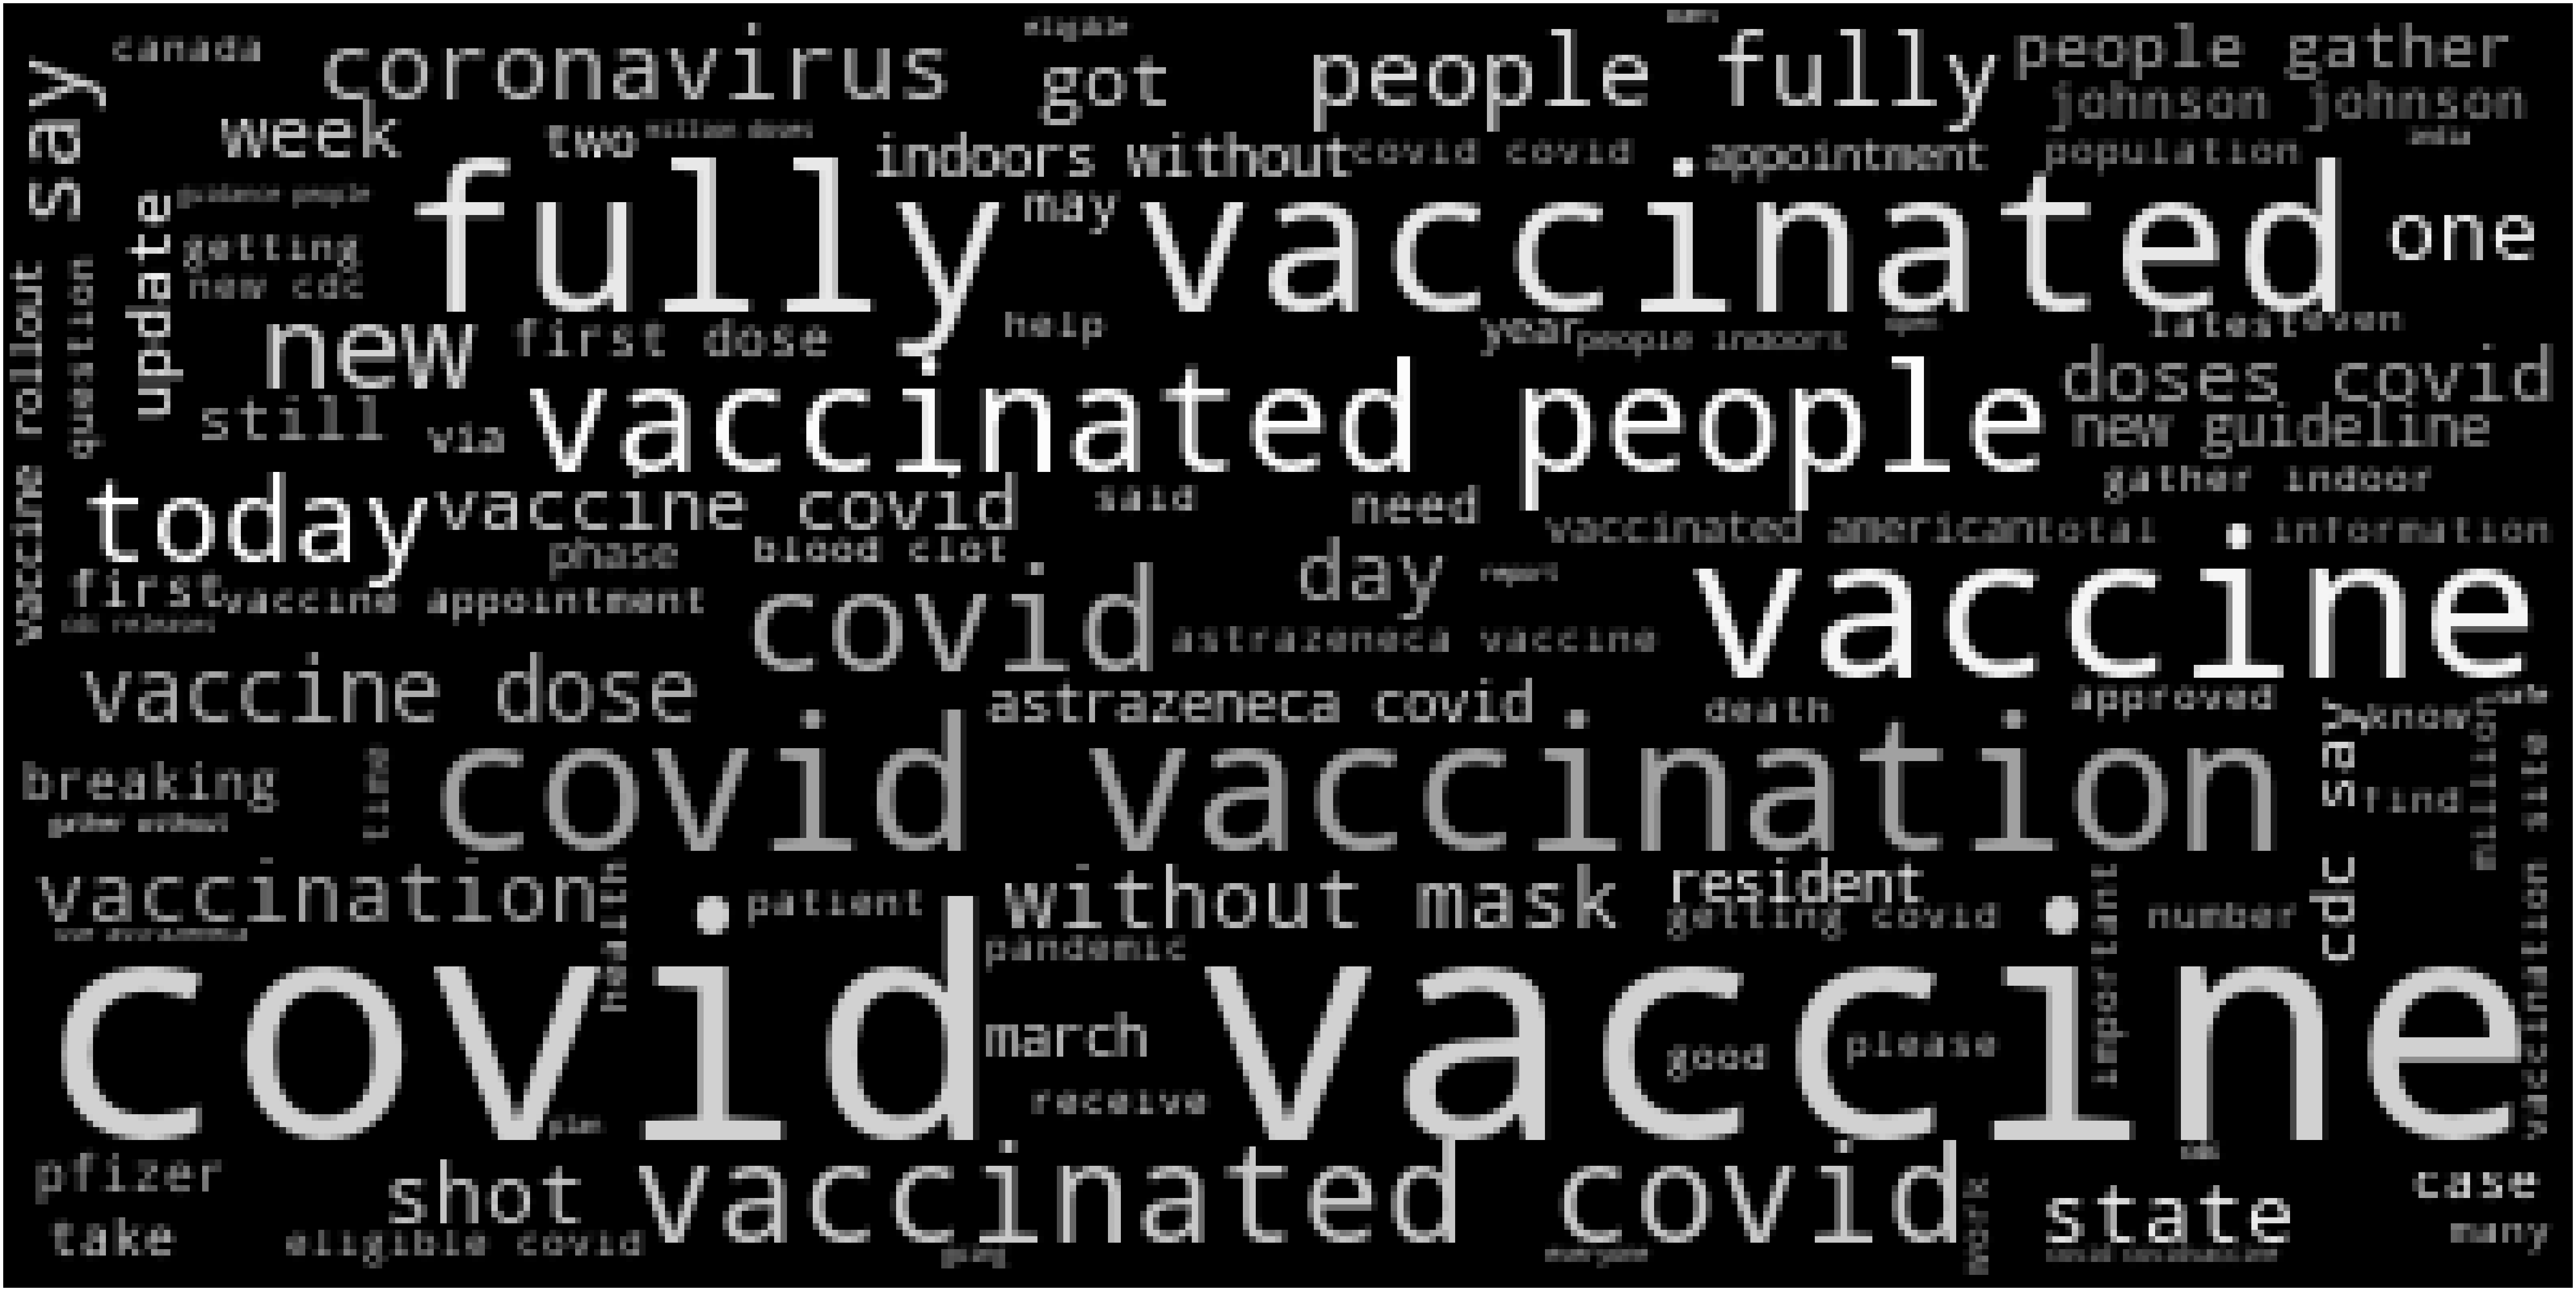

In [85]:
# Top words on tweets
wc(cleaned_total_neg,'black','Common Words' )